In [5]:
from keras.datasets.mnist import load_data
((x_train,y_train),(x_test,y_test)) = load_data()

In [6]:
print("訓練資料的維度",x_train.shape)
print("測試資料的維度",x_test.shape)

訓練資料的維度 (60000, 28, 28)
測試資料的維度 (10000, 28, 28)


ANS: 1


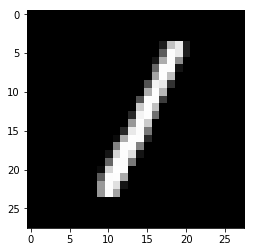

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0,59999)
print("ANS:",y_train[c])
plt.imshow(x_train[c],cmap="gray")

In [11]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,191,128,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,64,...,255,255,191,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,128,...,191,255,255,128,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,128,...,0,191,255,128,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,128,255,128,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,191,255,128,0,0,0,0,0,0


In [26]:
# 整理一下
# 進去前一定要常態化(好配合keras一開始隨機的那組weights)
# 還要攤開
x_train_shape = x_train.reshape(60000,784) / 255
x_test_shape = x_test.reshape(10000,784) / 255
# y進去的時候要one-hot encoding 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# show
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [34]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一個中間層, 一定要告訴多少個輸入(input_dim)
mlp.add(Dense(128, input_dim = 784, activation="relu"))
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [35]:
# 訓練前: 確定模型訓練方式
# 回歸:mse, 二元分類:binary_crossentropy, 多元分類:categorical_crossentrapy
mlp.compile(optimizer="adam", 
            loss="categorical_crossentropy", 
            metrics=["accuracy"])

In [36]:
# batch: 看幾張圖做一次梯度下降
# epochs: 整個資料及看幾次
# epoch = 10, batch=200, 60000 *10 /200 =3000梯度下降
mlp.fit(x_train_shape, 
        y_train_cat, 
        batch_size=200, 
        epochs=15, 
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 1s - loss: 0.4253 - acc: 0.8863 - val_loss: 0.1941 - val_acc: 0.9483
Epoch 2/15
 - 1s - loss: 0.1996 - acc: 0.9431 - val_loss: 0.1419 - val_acc: 0.9648
Epoch 3/15
 - 1s - loss: 0.1494 - acc: 0.9573 - val_loss: 0.1212 - val_acc: 0.9687
Epoch 4/15
 - 1s - loss: 0.1192 - acc: 0.9660 - val_loss: 0.1036 - val_acc: 0.9722
Epoch 5/15
 - 1s - loss: 0.0987 - acc: 0.9721 - val_loss: 0.0953 - val_acc: 0.9728
Epoch 6/15
 - 1s - loss: 0.0834 - acc: 0.9762 - val_loss: 0.0956 - val_acc: 0.9725
Epoch 7/15
 - 1s - loss: 0.0715 - acc: 0.9795 - val_loss: 0.0853 - val_acc: 0.9757
Epoch 8/15
 - 1s - loss: 0.0608 - acc: 0.9830 - val_loss: 0.0806 - val_acc: 0.9763
Epoch 9/15
 - 1s - loss: 0.0529 - acc: 0.9857 - val_loss: 0.0836 - val_acc: 0.9758
Epoch 10/15
 - 1s - loss: 0.0465 - acc: 0.9870 - val_loss: 0.0797 - val_acc: 0.9768
Epoch 11/15
 - 1s - loss: 0.0407 - acc: 0.9888 - val_loss: 0.0795 - val_acc: 0.9773
Epoch 12/15
 - 1s - loss: 0.0363 - a

In [37]:
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 0s 18us/step


[0.07300988621900324, 0.9779]

In [39]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, mlp.predict_classes(x_test_shape)))

,0,1,2,3,4,5,6,7,8,9
0,970,0,1,2,1,2,1,1,2,0
1,0,1123,3,1,0,1,2,2,3,0
2,5,1,1003,4,1,0,2,5,11,0
3,1,0,0,992,0,5,0,5,4,3
4,2,0,0,1,952,0,5,5,2,15
5,3,0,0,8,2,863,5,3,4,4
6,6,2,0,1,2,3,942,1,1,0
7,0,2,6,4,0,0,0,1007,1,8
8,4,0,3,6,3,2,3,4,946,3
9,2,4,0,7,5,1,0,8,1,981


你想要判斷的圖片名稱:test7.png
預測結果: [7]


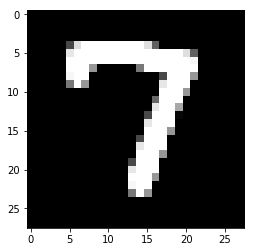

In [42]:
# PiLLow
from PIL import Image
import numpy as np
fn = input("你想要判斷的圖片名稱:")
img1 = np.array(Image.open(fn).resize((28,28)).convert("L"))
x_pre = np.array([img1]).reshape(1,784) / 255
print("預測結果:",mlp.predict_classes(x_pre))
plt.imshow(img1, cmap="gray")